# **DIAMANTES Y APRENDIZAJE SUPERVISADO**
_Por Nicole Lastra Quiroz - Junio 2022_

## Objetivo del proyecto

Predecir el precio de diamantes en función de sus atributos, usando un modelo basado en _Decision Tree Classifier_.



<img src='https://www.imer.mx/tropicalisima/wp-content/uploads/sites/19/Diamantes.jpg' style='float:center ; padding:16px'/>

Las variables son las siguientes:
- precio: precio en dólares estadounidenses (326 usd – 18,823 usd)
- quilate: peso del diamante (0,2–5,01)
- corte: calidad del corte (Regular, Buena, Muy buena, Premium, Ideal)
- color: color diamante, de J (peor) a D (mejor).
- claridad: una medida de la claridad del diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)).
- x: longitud en mm (0–10,74).
- y: anchura en mm (0–58,9).
- z: profundidad en mm (0–31,8).
- profundidad: porcentaje de profundidad total = z / media (x, y) = 2 * z / (x + y) (43–79).

#### Importación de librerías

In [45]:
# Para tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Para gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Para preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

#### Importación de los datos

Se deben tener en cuenta los mismos comentarios del desafío 1 respecto a la importación de datos. En este caso el dataset está contenido en `diamantes.xlsx` (documento que se debe tener en igual carpeta al archivo de este trabajo, o subir a carpeta de trabajo en Colab u otro online).

In [46]:
# Importación de datos:
# ------------------------------------------------------------------------------
dm = pd.read_excel('diamantes.xlsx')  

#### Visualización de los datos

Como en este caso no se tiene mayores antecedentes de los datos, comenzaremos revisando información en general.

In [47]:
# Revisión general de los datos
# ------------------------------------------------------------------------------
dm.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       53940 non-null  int64  
 1   quilate      53940 non-null  float64
 2   corte        53940 non-null  object 
 3   color        53940 non-null  object 
 4   claridad     53940 non-null  object 
 5   profundidad  53940 non-null  float64
 6   tabla        53940 non-null  float64
 7   x            53940 non-null  float64
 8   y            53940 non-null  float64
 9   z            53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Principales hallazgos:

- Se observa que hay un total de 53.940 filas de datos y un total de 10 columnas, en donde 3 de estas son del tipo `object`. 
- No existen valores nulos, lo que simplifica el paso de la limpieza y extracción de datos (en este caso se utilizará el total de datos).
- Se realizará una única tarea de limpieza express, ya que se deberá eliminar la columna `tabla`, puesto a que esta no es relevante para efectos de este estudio (principalemnte porque no está enunciada como parte a considerar dentro del desafío 2).

In [48]:
# Eliminación de columna "tabla"
# ------------------------------------------------------------------------------
dm = dm.drop(columns = ['tabla'])
dm.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       53940 non-null  int64  
 1   quilate      53940 non-null  float64
 2   corte        53940 non-null  object 
 3   color        53940 non-null  object 
 4   claridad     53940 non-null  object 
 5   profundidad  53940 non-null  float64
 6   x            53940 non-null  float64
 7   y            53940 non-null  float64
 8   z            53940 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.7+ MB


Procedemos a revisar 20 filas de datos para complementar.

In [49]:
# Revisión de 10 filas de datos 
# ------------------------------------------------------------------------------
dm.head(10)

precio  quilate      corte color claridad  profundidad     x     y     z
0     326     0.23      Ideal     E      SI2         61.5  3.95  3.98  2.43
1     326     0.21    Premium     E      SI1         59.8  3.89  3.84  2.31
2     327     0.23      Bueno     E      VS1         56.9  4.05  4.07  2.31
3     334     0.29    Premium     I      VS2         62.4  4.20  4.23  2.63
4     335     0.31      Bueno     J      SI2         63.3  4.34  4.35  2.75
5     336     0.24  Muy bueno     J     VVS2         62.8  3.94  3.96  2.48
6     336     0.24  Muy bueno     I     VVS1         62.3  3.95  3.98  2.47
7     337     0.26  Muy bueno     H      SI1         61.9  4.07  4.11  2.53
8     337     0.22    Regular     E      VS2         65.1  3.87  3.78  2.49
9     338     0.23  Muy bueno     H      VS1         59.4  4.00  4.05  2.39

No existen mayores hallagos derivados de esta visualización.

#####**Gráficas relevantes**

###### Gráficos de barras

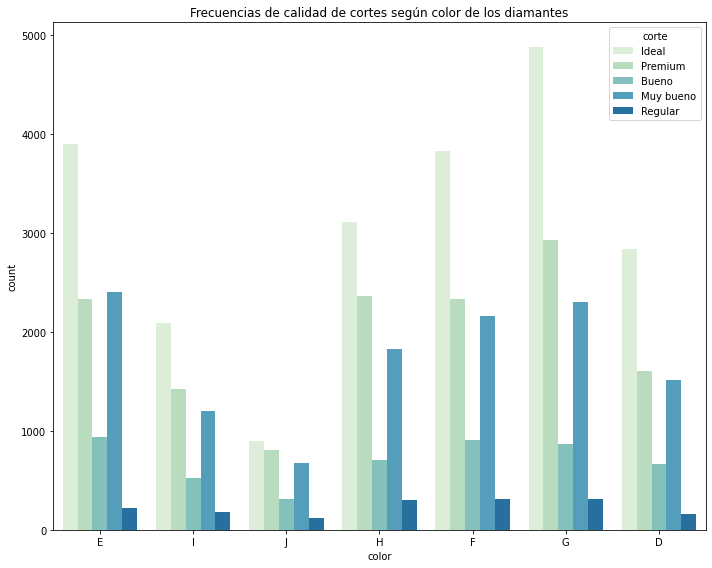

In [50]:
# Gráfico de barras 1
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize = (10, 8))

sns.countplot(x        = 'color',
             data      = dm, 
             hue       = 'corte',
             palette   = 'GnBu'
              )

plt.title('Frecuencias de calidad de cortes según color de los diamantes')
plt.tight_layout()
plt.show()

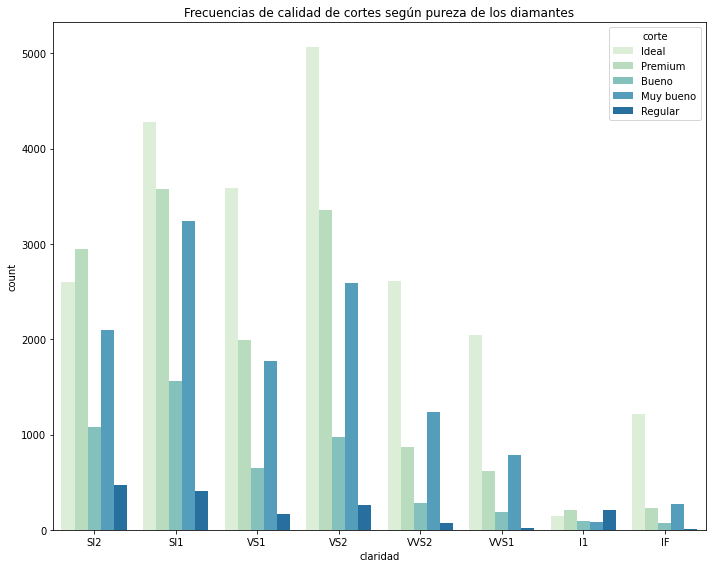

In [51]:
# Gráfico de barras 2
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize =(10, 8))

sns.countplot(x        = 'claridad',
             data      = dm, 
             hue       = 'corte',
             palette  = 'GnBu'
              )

plt.title('Frecuencias de calidad de cortes según pureza de los diamantes')
plt.tight_layout()
plt.show()

###### Mapa de calor

Text(0.5, 0.98, 'Correlacion entre variables')

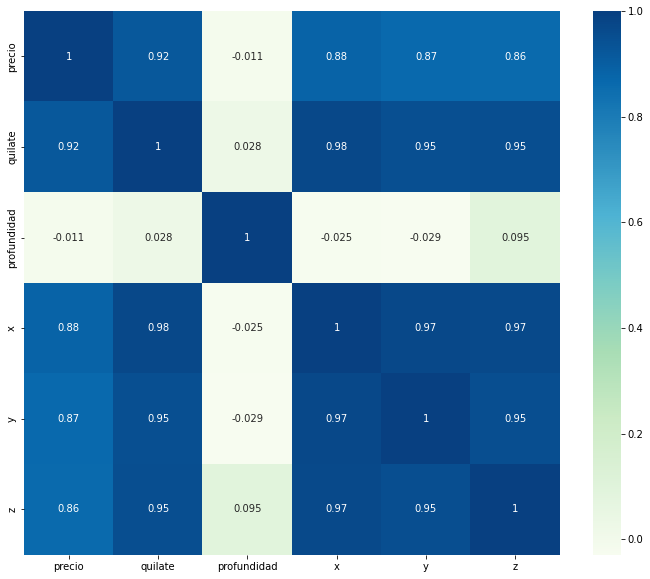

In [52]:
# Mapa de calor - correlación entrte variables numéricas
# ------------------------------------------------------------------------------
plt.figure(figsize = (12,10))

sns.heatmap(dm.corr(), 
            annot   = True,
            cmap    = 'GnBu')

fig.suptitle('Correlacion entre variables')

Principales hallazgos: 

- Existen grados de correlación relativamente altos entre la mayoría de las variables.
- El único caso en donde se evidencia una marcada diferencia (casi nula correlación), es entre la profundidad y otras variables.
- Se debe considerar que aquí no están los datos categóricos, por tanto no se podrían tomar decisiones apresuradas respecto a intuir una alta importancia como predictor del `precio` de los diamantes como, por ejemplo, de `quilate`.

###### Un poco de todo

La gráfica a continuación me pareció útil incluirla ya que complementa la información del mapa de calor.

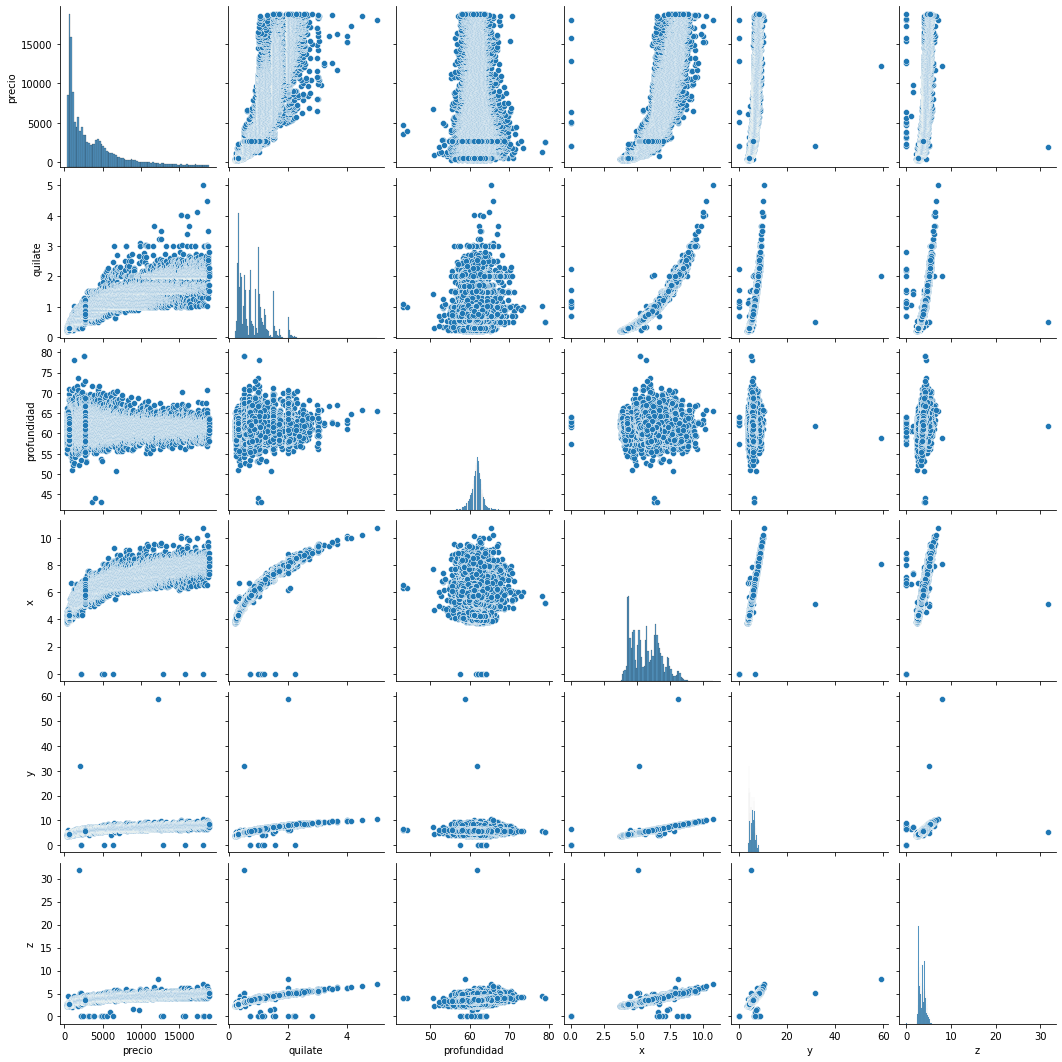

In [53]:
# Gráfico mixto
# ------------------------------------------------------------------------------
cols = ['precio', 'quilate', 'profundidad', 'x', 'y', 'z']

sns.pairplot(dm[cols], height = 2.5)
plt.show()

Principales hallazgos:

- Se observan, desde la nube de puntos, las diferntes correlaciones presentes ya evidenciadas en el mapa de calor.
- Se pueden visualizar datos atípicos en todas las representaciones, por tanto incluso en quienes presentan alta correlación existen estos comportamientos particulares (mayormente explicados por la influencia de las variables categóricas, por ejemplo un diamante con pocos quilates puede tener un alto precio ya que su claridad es alta, o su color es con mayor valor en el mercado).
- Se evidencia la casi nula correlación de `profundidad`, dada sus "pintorescas" distribuciones respecto de otras variables.

#### Decision Tree Regressor

En este caso se decide utilizar un árbol predictivo de tipo regressor, ya que la variable de estudio es del tipo contínua y en acuerdo a la literatura, este es el principal punto para tomar la decisión. Además, el estudio se relaciona directamente al precio de "algo", por lo que sus resultados serían imposibles de asignar a una u otra categoría (como en el caso de los árboles de clasificación), ya que aquí existe un rango de posibilidades dadas ciertas características. 

##### **División de los datos en grupos `test` y `train`**

Como tenemos variables categóricas entre los datos, en esta ocasión utilizaremos el `One Hot Encoder` para transformarlas, y luego trabajarlas.

In [54]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        dm.drop(columns = 'precio'),
                                        dm['precio'],
                                        random_state = 123
                                    )


# Identificación de nombre de las columnas numéricas y categóricas
# ------------------------------------------------------------------------------
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()


# Se aplica one-hot-encoding solo a las columnas categóricas
# ------------------------------------------------------------------------------
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
# ------------------------------------------------------------------------------
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

Ya divididos los datos se procede a re estructurarlos de forma que las columnas queden ligadas a sus respectivos datos post `One Hot Ecoder` aplicado.

Específicamente se convierte el output con `ColumTransformer` en data frame y se añade el nombre de las columnas.

In [55]:
# Nombre de todas las columnas
# ------------------------------------------------------------------------------
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

# Conversión a dataframe
# ------------------------------------------------------------------------------
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)

# Información del dataframe obtenido
# ------------------------------------------------------------------------------
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   quilate          40455 non-null  float64
 1   profundidad      40455 non-null  float64
 2   x                40455 non-null  float64
 3   y                40455 non-null  float64
 4   z                40455 non-null  float64
 5   corte_Bueno      40455 non-null  float64
 6   corte_Ideal      40455 non-null  float64
 7   corte_Muy bueno  40455 non-null  float64
 8   corte_Premium    40455 non-null  float64
 9   corte_Regular    40455 non-null  float64
 10  color_D          40455 non-null  float64
 11  color_E          40455 non-null  float64
 12  color_F          40455 non-null  float64
 13  color_G          40455 non-null  float64
 14  color_H          40455 non-null  float64
 15  color_I          40455 non-null  float64
 16  color_J          40455 non-null  float64
 17  claridad_I1 

##### **Creación y entrenamiento del modelo inicial**

Una vez procesados los datos de `train` y `test`, comenzamos con la definición de un modelo inicial, cuyos parámetros se asignan de forma default, para luego entrenarlo.

In [56]:
# Modelo inicial
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_prep, y_train)


DecisionTreeRegressor(max_depth=3, random_state=123)

##### **Visualizaciones del modelo inicial**

Profundidad del árbol: 3
Número de nodos terminales: 8


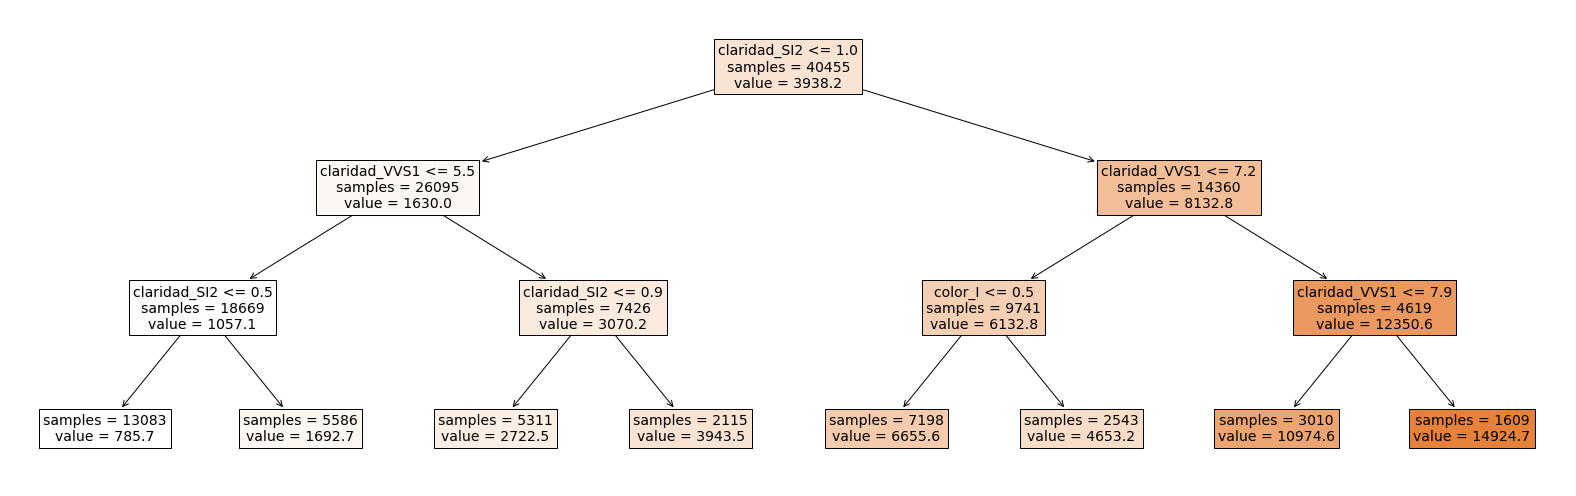

In [57]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize = (22, 7))

print(f'Profundidad del árbol: {modelo.get_depth()}')
print(f'Número de nodos terminales: {modelo.get_n_leaves()}')

plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(),
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = False,
            fontsize      = 14,
            precision     = 1,
            ax            = ax
       )
plt.tight_layout()

En color pálido se pueden apreciar resultados de valores menores y en color más intensos se distinguen los mayores.

In [58]:
# Visualización como árbol de texto
# ------------------------------------------------------------------------------
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = labels.tolist()
               )
print(texto_modelo)

|--- claridad_SI2 <= 1.00
|   |--- claridad_VVS1 <= 5.53
|   |   |--- claridad_SI2 <= 0.47
|   |   |   |--- value: [785.70]
|   |   |--- claridad_SI2 >  0.47
|   |   |   |--- value: [1692.73]
|   |--- claridad_VVS1 >  5.53
|   |   |--- claridad_SI2 <= 0.87
|   |   |   |--- value: [2722.50]
|   |   |--- claridad_SI2 >  0.87
|   |   |   |--- value: [3943.47]
|--- claridad_SI2 >  1.00
|   |--- claridad_VVS1 <= 7.19
|   |   |--- color_I <= 0.50
|   |   |   |--- value: [6655.57]
|   |   |--- color_I >  0.50
|   |   |   |--- value: [4653.20]
|   |--- claridad_VVS1 >  7.19
|   |   |--- claridad_VVS1 <= 7.86
|   |   |   |--- value: [10974.55]
|   |   |--- claridad_VVS1 >  7.86
|   |   |   |--- value: [14924.72]



Para efectos de aplicación de lo trabajado en clases, se agrega una visualización como árbol de texto.

##### **Importancia de predictores del modelo inicial**

In [59]:
# Cálculo y visualización de importancia de predictores del modelo inicial
# ------------------------------------------------------------------------------
importancia_predictores = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importancia': modelo.feature_importances_}
                            )
print('Importancia de los predictores en el modelo')
print('-------------------------------------------')
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
20     claridad_SI2     0.704538
23    claridad_VVS1     0.282097
15          color_I     0.013365
0           quilate     0.000000
13          color_G     0.000000
22     claridad_VS2     0.000000
21     claridad_VS1     0.000000
19     claridad_SI1     0.000000
18      claridad_IF     0.000000
17      claridad_I1     0.000000
16          color_J     0.000000
14          color_H     0.000000
12          color_F     0.000000
1       profundidad     0.000000
11          color_E     0.000000
10          color_D     0.000000
9     corte_Regular     0.000000
8     corte_Premium     0.000000
7   corte_Muy bueno     0.000000
6       corte_Ideal     0.000000
5       corte_Bueno     0.000000
4                 z     0.000000
3                 y     0.000000
2                 x     0.000000
24    claridad_VVS2     0.000000

Llama la atención de que este modelo utiliza apenas 3 predictores para obtener sus resultados, lo que hace pensar en el error asociado a esto y a las características de sus predicciones (todo lo mencionado se revisará más a delante en una comparación directa de modelos).

##### **Pruning por validación cruzada**

Existen diversos métodos de pruning, o poda de los árboles de decisión. Por ejemplo, se podría definir una acotación del árbol basado en su óptimo `max_depth`, como se realizó en el caso anterior, sin embargo y para variar, en este caso aplicaremos lo trabajado en clases, por lo que realizaremos esta poda buscando el `ccp_alpha` óptimo, con ayuda de `GridSearchCV`y de maximizar la profundidad del árbol, para luego aplicar el pruning.

Como observación, a mayor `ccp_alpha`, quiere decir que el árbol necesita de una mayor poda. En este caso observaremos que se encuentra el mejor hiperparámetro según mis recursos disponibles para procesar, es por ello que los márgenes de busqueda estarán entre 0 y 400 con 20 divisiones. se podrían utilizar otras combinaciones y jugar con aquello, pero consume aún más recursos (a modo de referencia, el código que sigue demoró al rededor de 25 minutos en Colab).

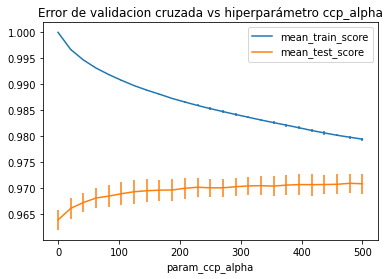

In [60]:
# Valores de ccp_alpha evaluados
# ------------------------------------------------------------------------------
param_grid = {'ccp_alpha':np.linspace(0, 500, 25)}

# Búsqueda por validación cruzada
# ------------------------------------------------------------------------------
grid = GridSearchCV(
        # La profundidad del árbol se libera al al máximo posible, para luego aplicar pruning
        # ----------------------------------------------------------------------
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_prep, y_train)

# Grafica de resultados
# ------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(6, 4))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title('Error de validacion cruzada vs hiperparámetro ccp_alpha');

Como en la gráfica no se visualiza a simple vista, procedemos a revisar cual es el óptimo `ccp_alpha` encontrado con la validación cruzada.

In [61]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 479.16666666666663}

Ahora podemos proceder con el del modelo final (para efectos de este trabajo).

##### **Visualización del modelo final**

Debemos notar, que como en la validación cruzada  definimos `refit = True`, el modelo se gurada automáticamente bajo `grid.best_estimator_` por lo que podemos trabajar directamente con él (no es necesario volver a definirlo, basta con sólo llamarlo), en este caso le asignaremos el nombre `modelo_final`.

Profundidad del árbol: 15
Número de nodos terminales: 304


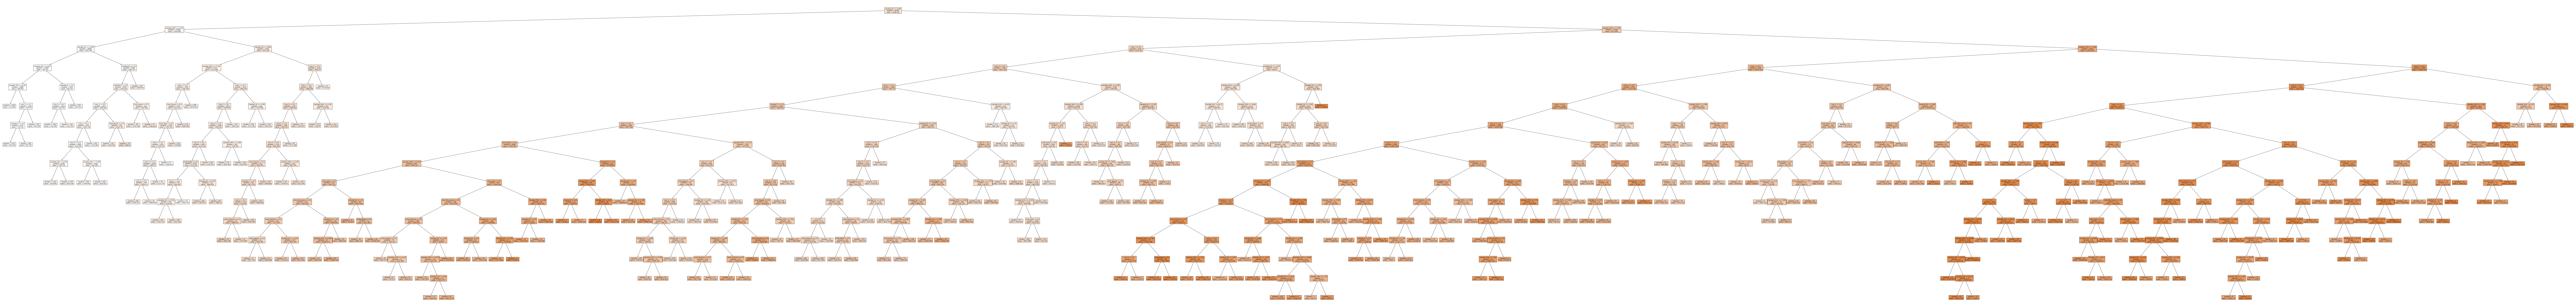

In [73]:
# Estructura del modelo final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f'Profundidad del árbol: {modelo_final.get_depth()}')
print(f'Número de nodos terminales: {modelo_final.get_n_leaves()}')

fig, ax = plt.subplots(figsize =(250, 30))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = labels.tolist(),
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = False,
            ax            = ax,
            fontsize      = 10
       )

plt.tight_layout()

En color pálido se pueden apreciar resultados de valores menores y en color más intensos se distinguen los mayores.

##### **Importancia de predictores del modelo final**

In [63]:
# Cálculo y visualización de la importancia de predictores del modelo final
# ------------------------------------------------------------------------------
importancia_predictores = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importancia': modelo_final.feature_importances_}
                            )
print('Importancia de los predictores en el modelo')
print('-------------------------------------------')
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
20     claridad_SI2     0.640834
23    claridad_VVS1     0.260197
15          color_I     0.019604
12          color_F     0.015342
14          color_H     0.014325
11          color_E     0.010233
10          color_D     0.007853
17      claridad_I1     0.007047
16          color_J     0.005647
9     corte_Regular     0.005636
8     corte_Premium     0.002456
5       corte_Bueno     0.002395
24    claridad_VVS2     0.001562
7   corte_Muy bueno     0.001425
6       corte_Ideal     0.001333
19     claridad_SI1     0.001144
22     claridad_VS2     0.000863
21     claridad_VS1     0.000804
18      claridad_IF     0.000354
1       profundidad     0.000305
13          color_G     0.000290
4                 z     0.000140
3                 y     0.000122
0           quilate     0.000089
2                 x     0.000000

Principales hallazgos:

- Se puede apreciar que el único predictor que no es utilizado por el modelo es `x` (longitud en mm).
- Como principal predictor, muy por sobre los demás con un 0.64, se encuentra `claridad_SI2`.
- En el segundo y tercer lugar se encuentran `claridad_VVS1` y `color_I`.
- Coincide que `claridad_SI2` hace referencia a la segunda peor categoría de su clasificación, y que `claridad_VVS1` hace referencia a la segunda mejor categooría.

##### **Comparativa de predicciones y evaluaciones de los modelos inicial y final**

Comenzaremos revisando las predicciones del modelo inicial, visualizando 8 valores de diamantes asignados por dicho modelo.

In [64]:
# Definición de predicciones y visualización
#-------------------------------------------------------------------------------
predicciones1 = modelo.predict(X = X_test_prep)
predicciones1[:8]

array([ 785.70297332,  785.70297332, 6655.56765768,  785.70297332,
       3943.47044917,  785.70297332, 2722.49896441,  785.70297332])

Se obtienen valores que a simple vista, y dado los datos observados en el dataset inicial, no parecen descabellados, pero como éstas predicciones obedecen a un modelo, revisemos cuál es el error asociado a ellas.

In [65]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones1,
        squared = False
       )
print(f'El error (rmse) de test del modelo inicial es: {rmse}')

El error (rmse) de test del modelo inicial es: 1409.1661737106524


En este caso el error es casi más alto que varios de los valores enunciados en nuestra predicción, por lo que es casi seguro que existan discrepancias con la realidad. Además, recordemos que este modelo utilizaba sólo tres predictores de la larga lista proporcionada, por lo que no es extraño que se aleje un tanto de lo real para ciertos valores, o varios de ellos.

Revisemos ahora lo mismo, pero para el `modelo_final`, es decir 8 predicciones y su error asociado.

In [66]:
# Definición de predicciones y visualización
#-------------------------------------------------------------------------------
predicciones2 = modelo_final.predict(X = X_test_prep)
predicciones2[:8]

array([ 692.93625498,  915.65770454, 6670.89516129,  915.65770454,
       3171.76829268,  915.65770454, 3126.38075314,  879.73549884])

In [67]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones2,
        squared = False
       )
print(f'El error (rmse) de test del modelo final es: {rmse}')

El error (rmse) de test del modelo final es: 667.481291166289


En este caso, el `modelo_final` se aleja sólo 667.48 dólares de los resultados, versus los más de 1409 dólares que se alejaba el primero modelo. Esto también se ve reflejado en la variación de los resultados obtenidos como predicción en esta segunda vuelta, versus la primera.

En definitiva, se logra optimizar el modelo final versus el inicial, consiguiendo un modelo adecuado para predecir los valores de los diamantes.

📖
---

**Referencias**

- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Libro.

- Árboles de desición con Python: Regresión y Clasificación by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at [_(Link)_](https://www.cienciadedatos.net/documentos/py08_random_forest_python.htmlhttps://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html) 

- Matplotlib 3.5.2 documentation [_(Link)_](https://matplotlib.org/stable/index.html)
- Scikit-learn.org/stable/modules/tree

- Scikit-learn.org/stable/modules/ensemble